In [2]:
import os
from google.colab import drive

# Mount google drive
DRIVE_MOUNT='/content/gdrive'
drive.mount(DRIVE_MOUNT)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# map

(483, 415, 3)


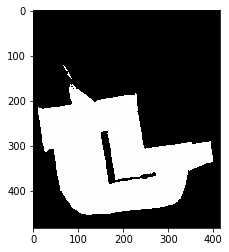

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

map_path = "./skir.pgm"
map = cv2.imread(map_path)
print(map.shape)
plt.figure()
plt.imshow(map)


# waypoint

<Figure size 432x288 with 0 Axes>

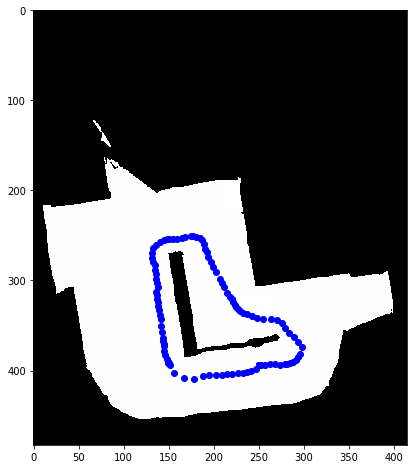

In [4]:
import csv

path = './waypoints.csv'

x = []
y = []
d = [-10.88522*20, -3.476622*20]
dx = 10.788522*20
dy = 483-3.476622*20
with open(path) as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  for row in csv_reader:
    
    x.append(float(row[0]))
    y.append(float(row[1]))

plt.figure()

l = len(x)
x_ = x[:l-188]
y_ = y[:l-188]
x_new = []
y_new = []
for i in range(len(x_)-1):
  if i%10 == 0:
    x_new.append((x_[i])*20+dx) 
    y_new.append((-y_[i])*20+dy)
    

plt.figure(figsize=(8,8))
plt.imshow(map)

plt.scatter(x_new, y_new, c='b')
plt.show()

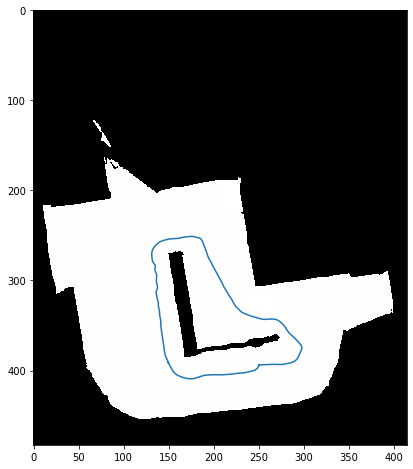

In [5]:
from scipy.interpolate import CubicSpline
from scipy import interpolate


x_array = np.array(x_new)
y_array = np.array(y_new)
x_ = np.r_[x_array, x_array[0]]
y_ = np.r_[y_array, y_array[0]]
tck, u = interpolate.splprep([x_, y_], s=0)
xi, yi = interpolate.splev(np.linspace(0,1,1000), tck)

plt.figure(figsize=(8,8))
plt.imshow(map)
plt.plot(xi, yi)

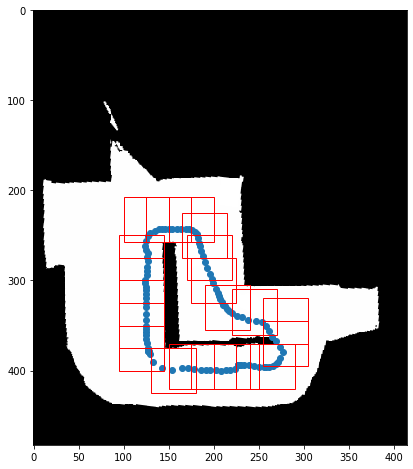

In [6]:
from matplotlib.patches import Rectangle
import copy

(w,h) = map.shape[:2]
center = (w/2, h/2)
M = cv2.getRotationMatrix2D(center, -7, 1.0)

xx = x_array*M[0,0] + y_array*M[0,1] + M[0,2]
yy = x_array*M[1,0] + y_array*M[1,1] + M[1,2]
rotated_image = cv2.warpAffine(map, M, (h, w))
map_gap = copy.deepcopy(rotated_image)
map_gap[363:372, 250:270,:] = 0

fig, ax = plt.subplots(1,figsize=(8,8))
plt.imshow(map_gap)

x1 = np.array([95., 95., 95., 95., 95., 100., 125., 150., 165., 170., 175., 190., 220., 255., 255., 240., 200., 175., 150., 130.])
y1 = np.array([350., 325., 300., 275., 250., 207., 207., 207., 225., 250., 275., 305., 310., 320., 345., 370., 370., 370., 370., 375.])
ll = len(x1)

for i in range(len(x1)):
  rect = Rectangle((x1[i],y1[i]),50,50,linewidth=1,edgecolor='r', facecolor='none') 
  ax.add_patch(rect)

ax.scatter(xx,yy)

# first sample

In [0]:
ll = 13
# x1 = np.array([95., 95., 95., 95., 95., 100., 125., 150., 165., 170., 175., 190., 220., 250., 250., 240., 200., 175., 150., 130.]).reshape(20,1)
# y1 = np.array([350., 325., 300., 275., 250., 207., 207., 207., 225., 250., 275., 305., 310., 320., 345., 370., 370., 370., 370., 375.]).reshape(20,1)

x1 = np.array([85., 85., 85., 100., 150., 165., 175., 190., 220., 270.,  220., 175., 130.]).reshape(13,1)
y1 = np.array([350., 300., 250., 222.,  222., 225., 275., 305., 300., 345., 380.,  380., 385.]).reshape(13,1)
x2 = x1 + 50
y2 = y1 + 50

x_sample = np.random.uniform(x1, x2, (ll, 1000))
y_sample = np.random.uniform(y1, y2, (ll, 1000))



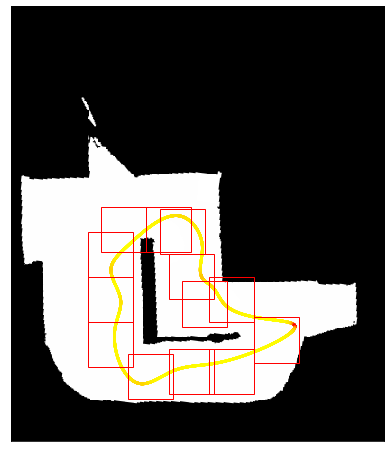

In [8]:
import matplotlib
fig, ax = plt.subplots(1,figsize=(8,8))
plt.imshow(rotated_image)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

for i in range(len(x1)):
  rect = Rectangle((x1[i],y1[i]),50,50,linewidth=1,edgecolor='r', facecolor='none') 
  ax.add_patch(rect)
  # plt.scatter(x_sample[i,0], y_sample[i,0])
  # plt.scatter(x_sample[i,1], y_sample[i,1])

x_0 = x_sample[:,195]
y_0 = y_sample[:,195]

x_0_ = np.r_[x_0, x_0[0]]
y_0_ = np.r_[y_0, y_0[0]]
tck, u = interpolate.splprep([x_0_, y_0_], s=0, per=1)
xxi, yyi = interpolate.splev(np.linspace(0,1,10000), tck)
dx = np.gradient(xxi)
dy = np.gradient(yyi)
d2x = np.gradient(dx)
d2y = np.gradient(dy)

curvatre = np.abs(dx*d2y-d2x*dy)/(dx*dx+dy*dy)**1.5
norm = plt.Normalize(curvatre.min(),curvatre.max())
n_c = norm(curvatre)

cm = plt.get_cmap('coolwarm')
max_id = np.argmax(curvatre)
min_id = np.argmin(curvatre)

# plt.scatter(xxi[max_id], yyi[max_id], color='r', s=50)
# plt.scatter(xxi[min_id], yyi[min_id], color='g', s=50)


plt.scatter(xxi, yyi, c=(1-n_c), cmap='autumn',s = 3)
plt.show()


# ax.scatter(xx,yy)

8.734056830464795


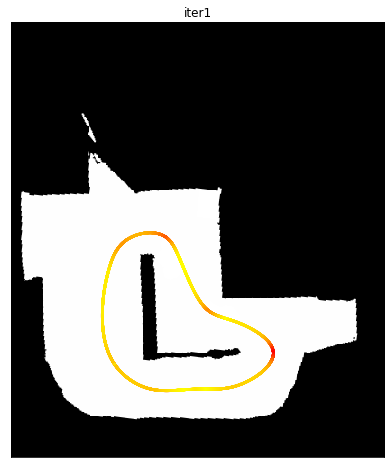

251.4134682364173
8.165728544290669


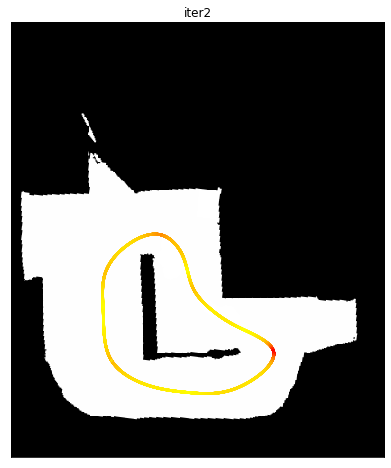

183.2296611152742
6.981327937018629


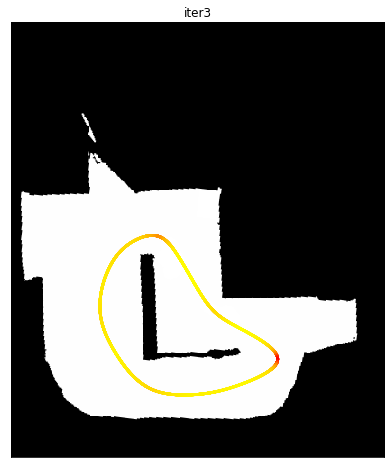

148.00096315462994
7.587736343025305


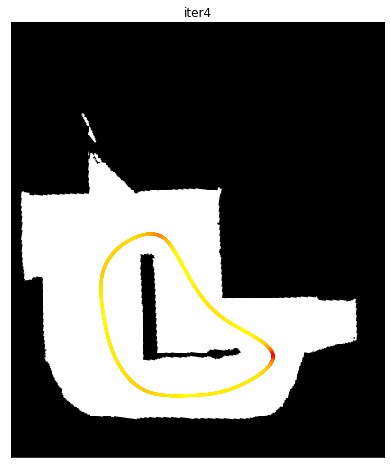

119.97374588907886
7.075945779539125


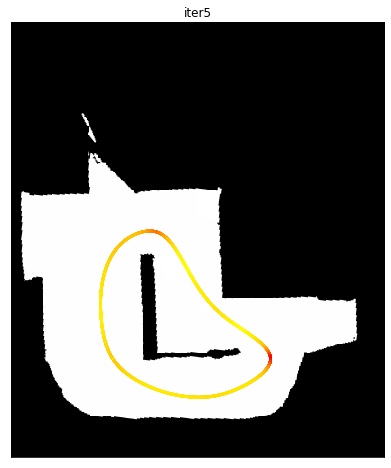

103.94276142028185
6.904805893487839


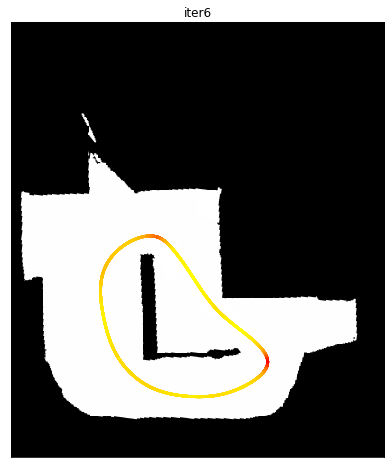

86.49016158117388
6.616287872140553


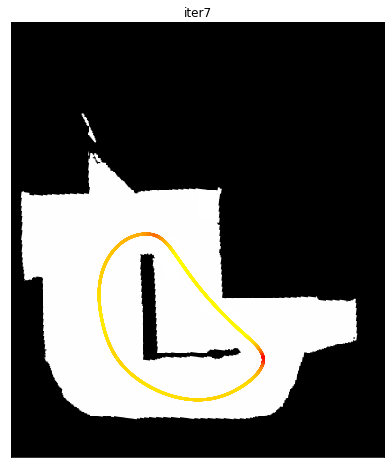

79.70682351890244
6.588588498077865


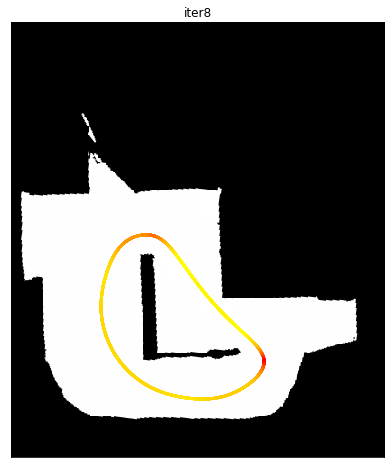

71.40731739024663
6.621590210605509


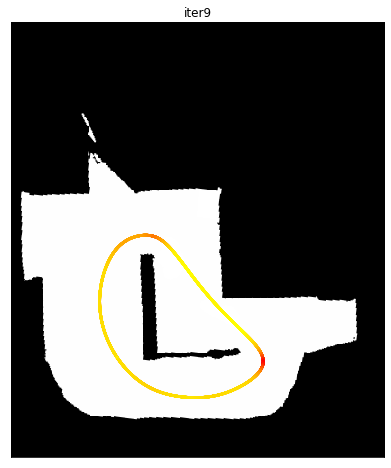

59.67513242213143
6.529767370097976


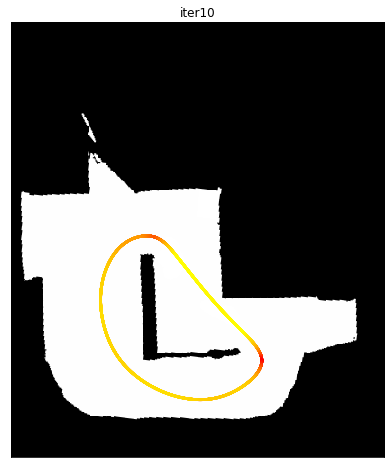

52.30905648118268
6.4582763867233215


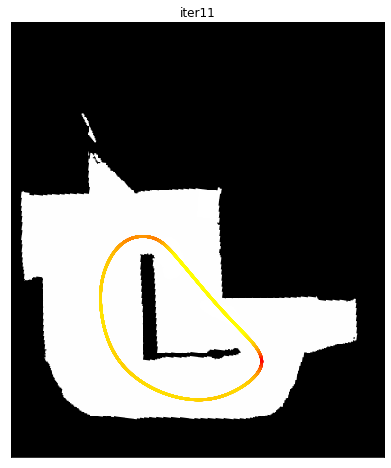

48.020619783317564
6.374908334785274


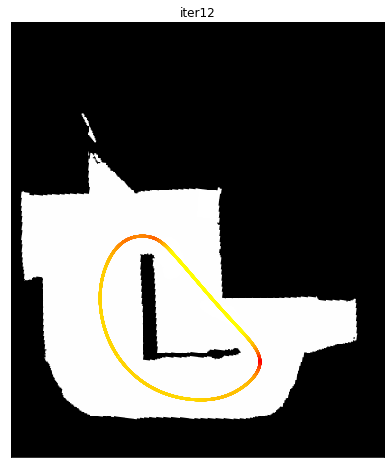

43.68134552714483
6.342704751873306


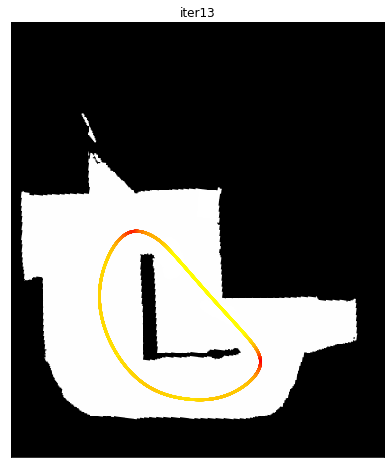

42.37694793014145
6.30287137620469


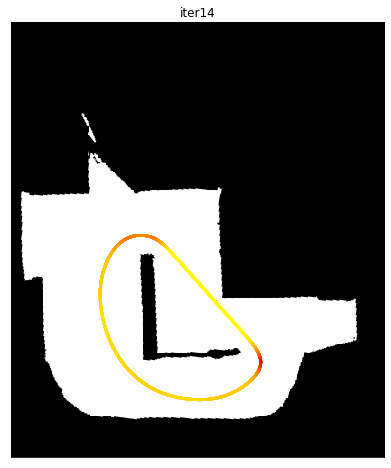

39.61730177258706
6.282893347282104


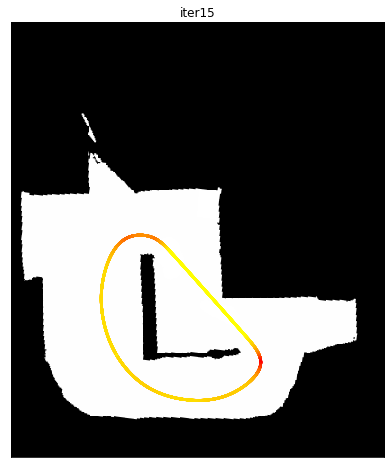

34.38111999901611
6.2828888220776


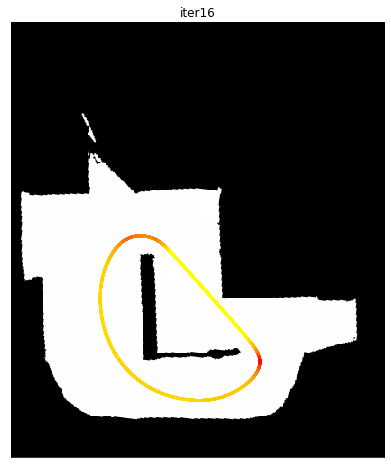

31.756532782445763
6.282768655754903


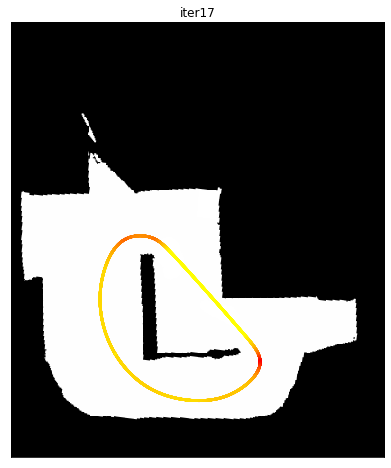

27.77478071820098
6.282686647873168


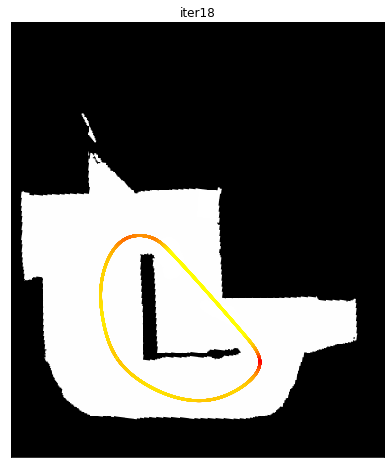

26.131464481610912
6.282696446462313


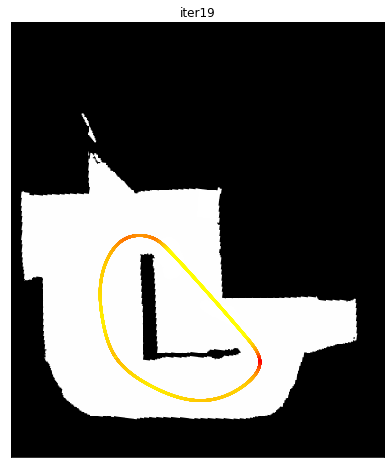

24.489845922709552
6.282633648525267


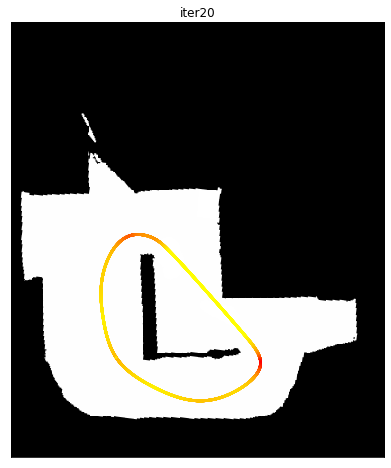

22.213001183901078
6.2826239563381465


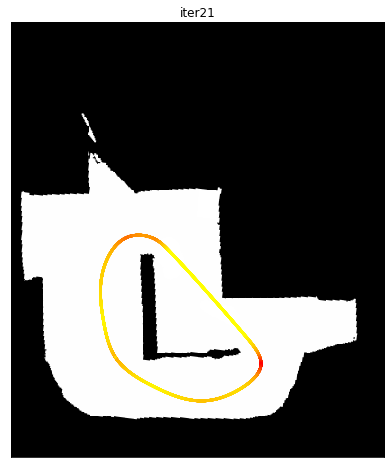

20.245667122384113
6.2825870709360325


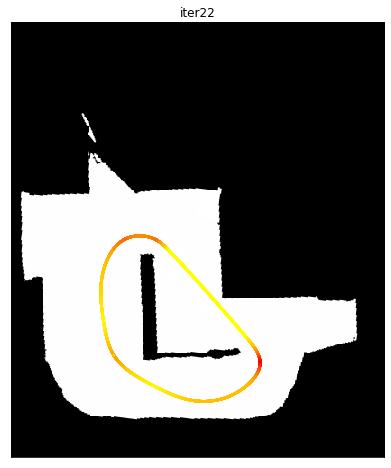

19.542736104723325
6.282526993305111


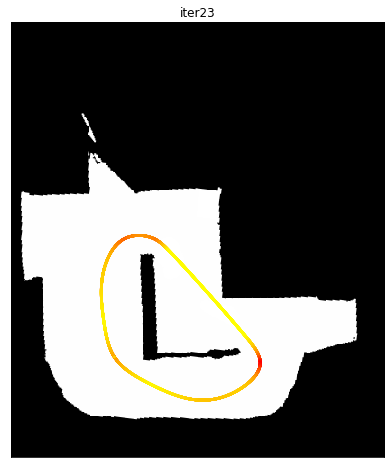

18.383257530750527
6.282486669992919


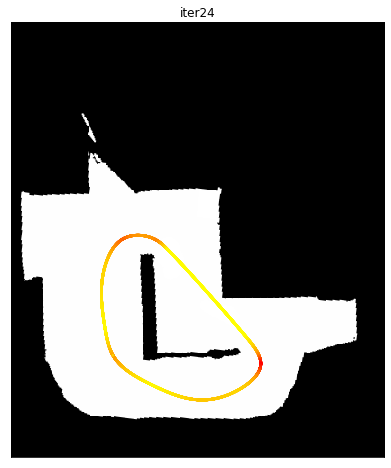

16.265637532551917
6.2824924860511695


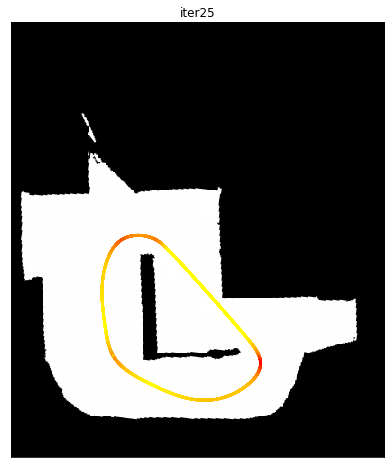

14.038880697878287
6.282462566979001


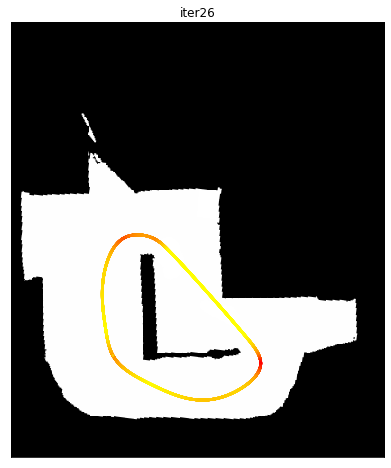

11.668063673984467
6.282412058851264


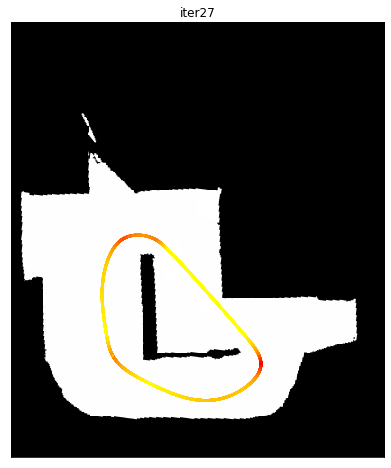

11.053940568777023
6.282399494934603


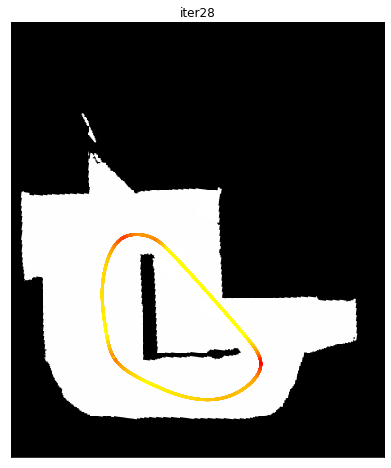

9.803711212857442
6.282368108227417


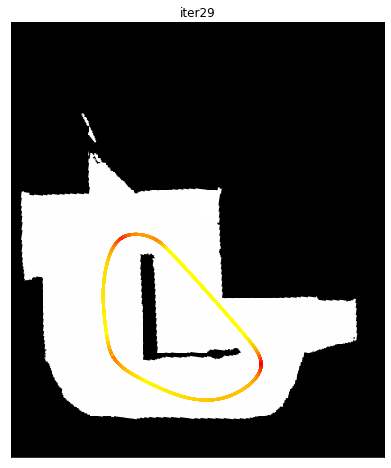

8.481138660816534
6.2823216977259815


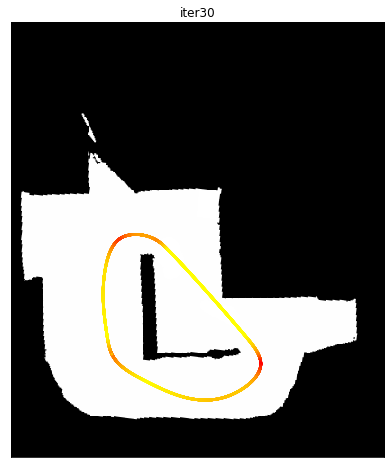

7.941979512264082
6.282316610119626


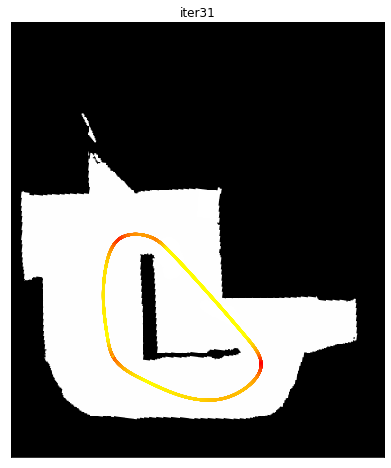

6.968135296109775
6.282283178548393


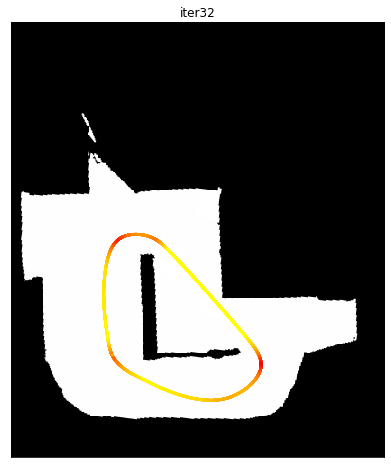

6.492605055775076
6.282261649545778


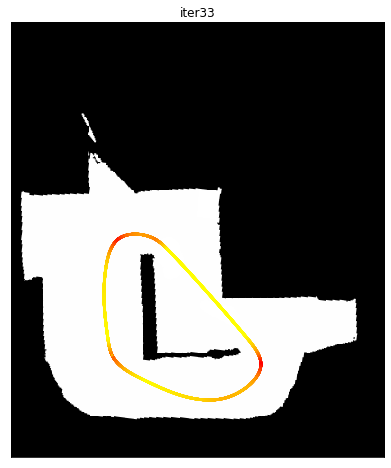

6.066294157324169
6.282200645106888


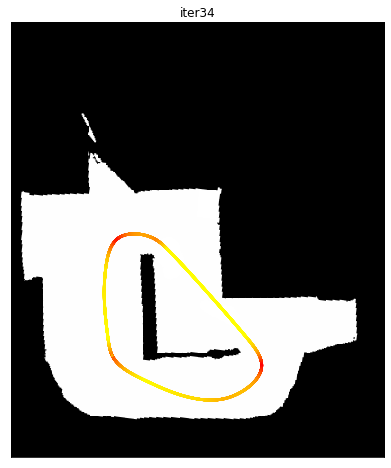

5.82443732361513
6.282200206667223


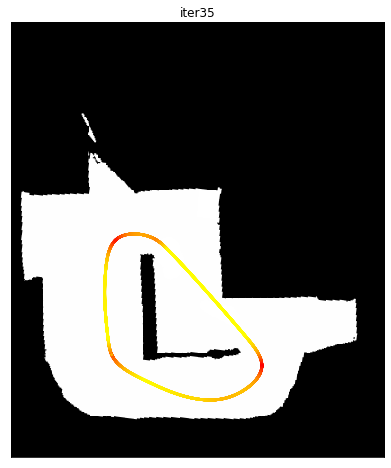

5.560182761899711
6.282179202323003


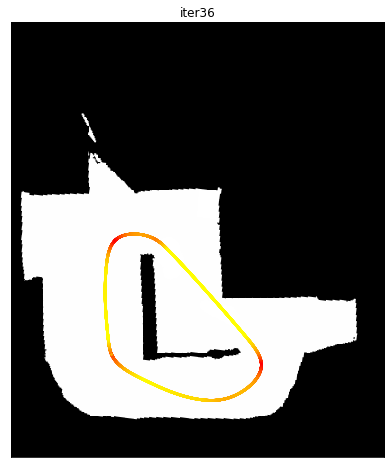

5.4910166749083285
6.282174651058905


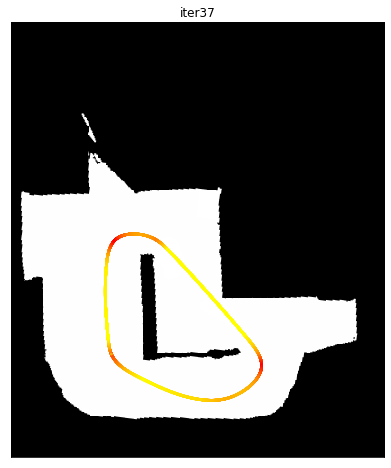

5.1386530761760065
6.28215133442791


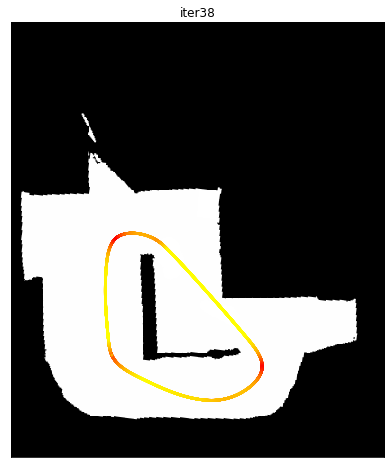

4.617656933703029
6.282131379654238


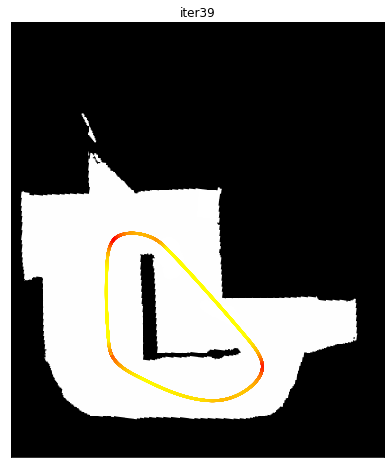

4.549830165638464
6.282110741352381


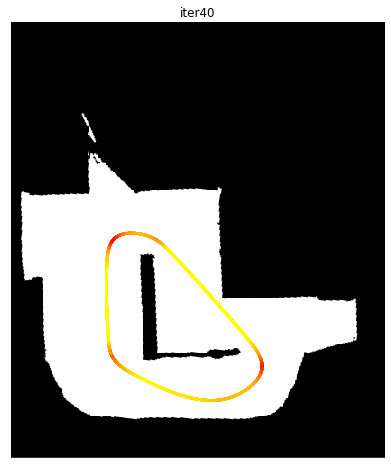

3.9625421561653096
6.282086211187276


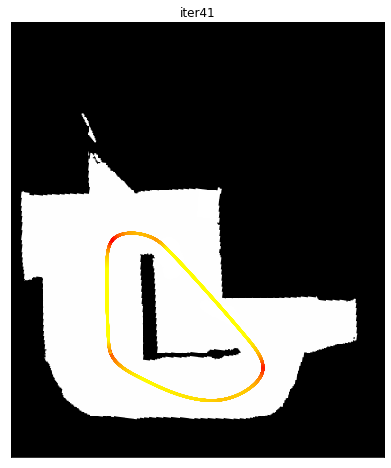

3.6196471283286806
6.282071187008276


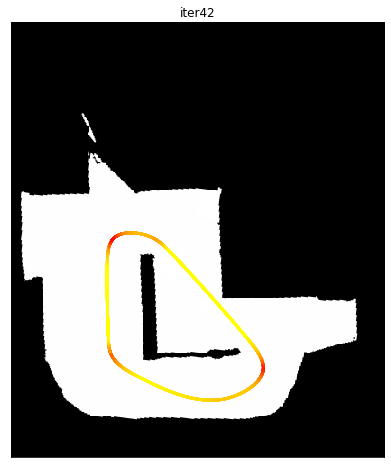

3.428052983743107
6.282069256239388


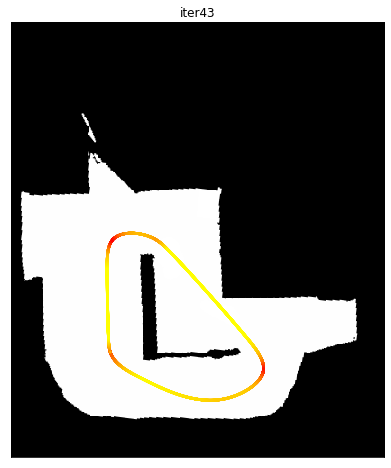

3.624659927317519
6.282049809773077


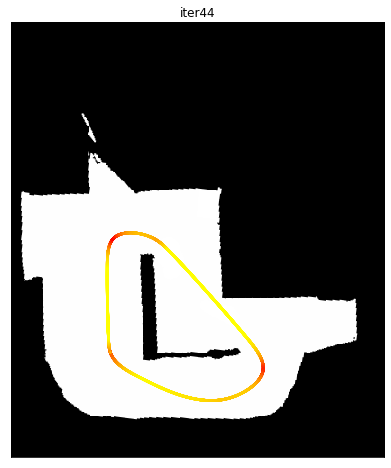

3.5723360231433996
6.2820453588127165


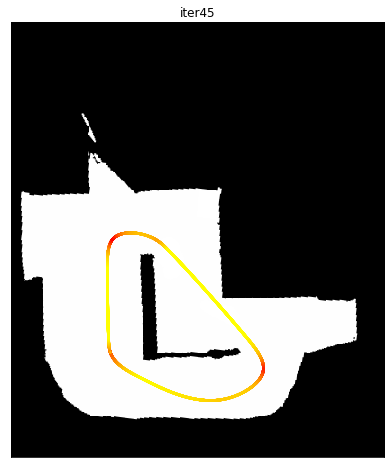

3.4649438394643086
6.282034658384794


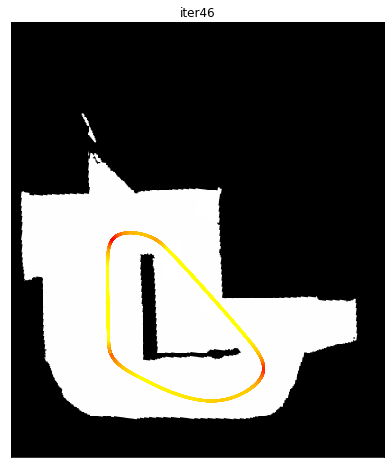

3.2660882226807932
6.282026769339164


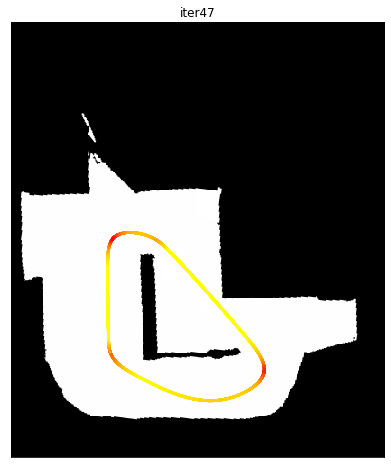

3.0775600087539945
6.282016030234166


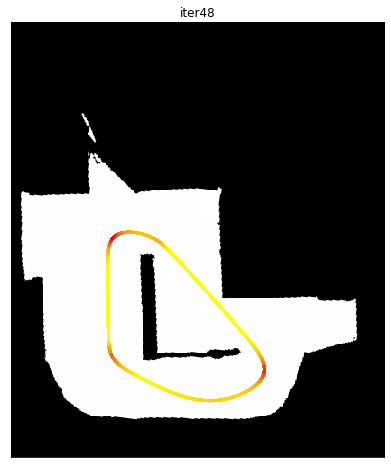

2.751661643165674
6.282011880602792


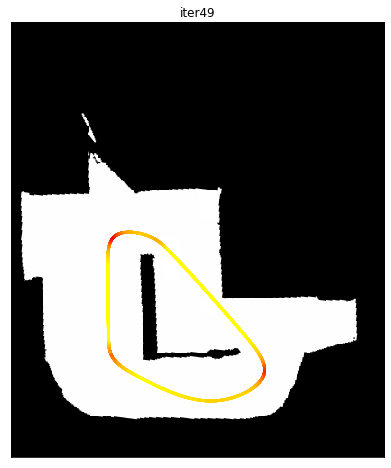

2.755325834304727
6.28200453196196


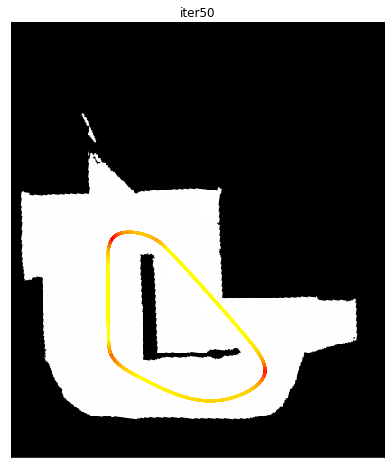

2.7231589721151717


In [9]:
import matplotlib.animation as animation

kk =1
loss_lst = []
cov_norm_lst = []
for k in range(50):
  t_lst = []
  fig, ax = plt.subplots(1,figsize=(8,8))
  plt.imshow(rotated_image)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  if k == 19:
    kk = 1
  for i in range(1000):
    x_0 = x_sample[:,i]
    y_0 = y_sample[:,i]

    x_0_ = np.r_[x_0, x_0[0]]
    y_0_ = np.r_[y_0, y_0[0]]
    tck, u = interpolate.splprep([x_0_, y_0_], s=0, per=kk)
    xxi, yyi = interpolate.splev(np.linspace(0,1,10000), tck)
    ff = np.array([xxi, yyi], dtype = int)
    if np.any(map_gap[ff[1],ff[0]] == 0):
      t = 1000000
    else:
      dx = np.gradient(xxi)
      dy = np.gradient(yyi)
      d2x = np.gradient(dx)
      d2y = np.gradient(dy)

      curvatre = np.abs(dx*d2y-d2x*dy)/(dx*dx+dy*dy)**1.5
      l = np.sqrt((xxi[1:]-xxi[:-1])**2 + (yyi[1:]-yyi[:-1])**2)
      l_ = np.r_[l,l[0]]
      r = 1./curvatre

      v = 1+ 4*(r-r.min())/(r.max()-r.min())

      # t = (l_/v).sum()
      t = (l_*curvatre).sum()
    t_lst.append(t)
  
  t_lst = np.array(t_lst)
  print(np.min(t_lst))
  index = np.argsort(t_lst)
  loss_lst.append(np.min(t_lst))
  
  
  
  x_0 = x_sample[:,index[:10]].mean(axis = 1)
  y_0 = y_sample[:,index[:10]].mean(axis = 1)
  # for i in range(len(x_0)):
  #   plt.scatter(x_0[i], y_0[i])

  x_0_ = np.r_[x_0, x_0[0]]
  y_0_ = np.r_[y_0, y_0[0]]
  tck, u = interpolate.splprep([x_0_, y_0_], s=0, per=kk)
  xxi, yyi = interpolate.splev(np.linspace(0,1,10000), tck)
  # for i in range(len(xxi)):
  #   if i%200 == 0:
  #     plt.scatter(xxi[i], yyi[i], color='b')
  

  dx = np.gradient(xxi)
  dy = np.gradient(yyi)
  d2x = np.gradient(dx)
  d2y = np.gradient(dy)

  curvatre = np.abs(dx*d2y-d2x*dy)/(dx*dx+dy*dy)**1.5
  norm = plt.Normalize(curvatre.min(),curvatre.max())
  n_c = norm(curvatre)

  # cm = plt.get_cmap('coolwarm')
  max_id = np.argmax(curvatre)
  min_id = np.argmin(curvatre)

  # plt.scatter(xxi[0], yyi[0], color='b', s=50)
  # plt.scatter(xxi[max_id], yyi[max_id], color='r', s=50)
  # plt.scatter(xxi[min_id], yyi[min_id], color='g', s=50)
  plt.scatter(xxi, yyi, c=(1-n_c), cmap='autumn',s = 3)
  plt.title("iter"+str(k+1))
  # for i in range(len(xxi)):
    # if i%200 == 0:
      # plt.scatter(xxi[i], yyi[i], color='b')
  
  plt.show()

  index = np.argsort(t_lst)
  live_index = index[:100]

  x_live = x_sample[:,live_index]
  y_live = y_sample[:,live_index]

  live_mean_x = x_live.mean(axis=1)

  live_mean_y = y_live.mean(axis=1)

  coord = []
  x_sample = np.zeros((ll,1000), dtype=float)
  y_sample = np.zeros((ll,1000), dtype=float)
  
  cov_norm = 0
  for i in range(len(x_live)):
    live_cov_i = np.cov(x_live[i,:], y_live[i,:])
    cov_norm = cov_norm + np.linalg.norm(live_cov_i)
    live_mean_x_i = live_mean_x[i]
    live_mean_y_i = live_mean_y[i]
    coord_i = np.random.multivariate_normal((live_mean_x_i, live_mean_y_i), live_cov_i, 1000)
    x_sample[i] = np.clip(coord_i[:,0], x1[i], x2[i])
    y_sample[i] = np.clip(coord_i[:,1], y1[i], y2[i])
  print(cov_norm/len(x_live))
  cov_norm_lst.append(cov_norm/len(x_live))






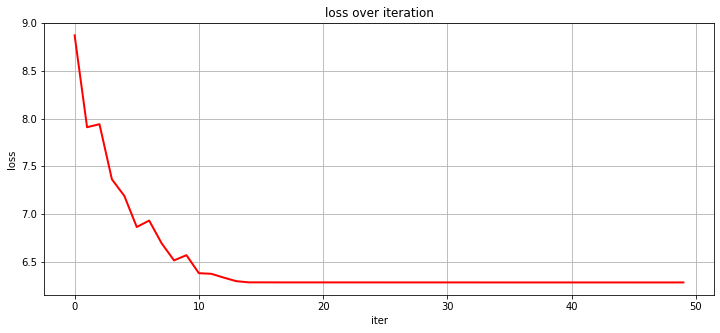

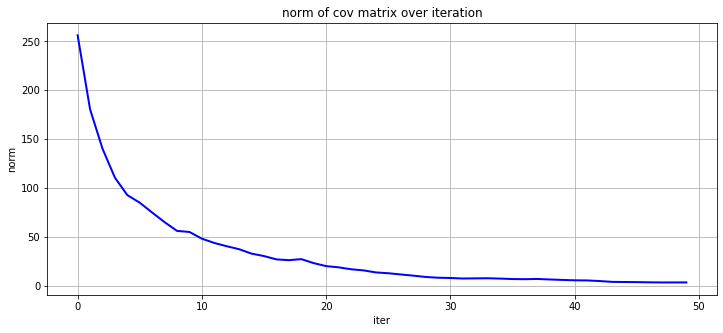

In [0]:
plt.figure(figsize=(12,5))
plt.plot(loss_lst, linewidth=2 ,color = 'r')
plt.title('loss over iteration')
plt.xlabel('iter')
plt.ylabel('loss')
plt.grid(which='major', axis='both')
plt.show()
plt.figure(figsize=(12,5))
plt.plot(cov_norm_lst, linewidth=2, color = 'b')
plt.title('norm of cov matrix over iteration')
plt.xlabel('iter')
plt.ylabel('norm')
plt.grid(which='major', axis='both')
plt.show()

[[ 0.99254615  0.12186934]
 [-0.12186934  0.99254615]]


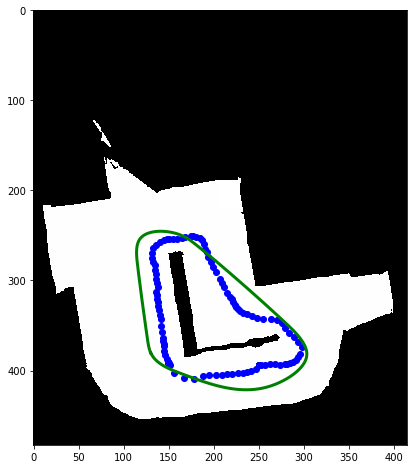

In [12]:
from numpy.linalg import inv
m = M[:,:2]
inv_m = inv(m)

print(inv_m)
# xxi
# yyi



xx = (xxi-M[0,2])*M[0,0] + (yyi-M[1,2])*(-M[0,1])
yy = (xxi-M[0,2])*(-M[1,0]) + (yyi-M[1,2])*M[1,1]

plt.figure(figsize=(8,8))
plt.imshow(map)
plt.plot(xx, yy, linewidth =3, c='g')
plt.scatter(x_new, y_new, c='b')


# rotated_image = cv2.warpAffine(map, M, (h, w))

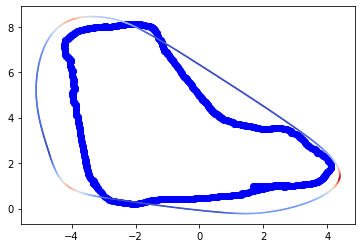

679
679


Text(0, 0.5, 'velocity')

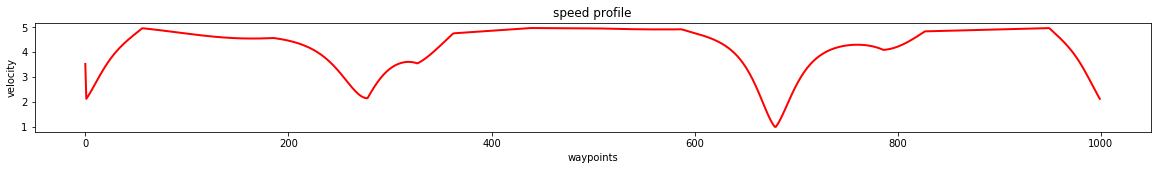

In [0]:

import csv

path = './waypoints.csv'

x = []
y = []
d = [-10.88522*20, -3.476622*20]
dx = 10.788522*20
dy = 483-3.476622*20
with open(path) as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  for row in csv_reader:
    # print(row[0])
    
    x.append(float(row[0]))
    y.append(float(row[1]))

x_save = (xx-dx)/20.
y_save = (yy-dy)/(-20.)


plt.scatter(x, y, c='b')
norm = plt.Normalize(curvatre.min(),curvatre.max())
n_c = norm(curvatre)



cm = plt.get_cmap('coolwarm')



xx_save = []
yy_save = []
n_cc = []
for i in range(len(x_save)):
  if i%10 == 0:
    xx_save.append(x_save[i])
    yy_save.append(y_save[i])
    n_cc.append(n_c[i])

plt.scatter(xx_save, yy_save, c=n_cc, cmap='coolwarm',s = 0.5)
plt.show()
    
n_cc = np.array(n_cc)

speed = 4*((n_cc.max()-n_cc)) + 1
print(np.argmin(speed))
print(np.argmax(n_cc))
with open('./my_waypoints.csv', 'w') as file:

    writer = csv.writer(file)
    for i in range(len(xx_save)):
      writer.writerow([xx_save[i], yy_save[i], speed[i]])

plt.figure(figsize=(20,2))
plt.plot(speed, linewidth=2, c='r')
plt.title('speed profile')
plt.xlabel('waypoints')
plt.ylabel('velocity')